# Forces in stack of axis (Snake)

This notebook goes together with Basics : Forces

It also demonstrates that the force applied on a grand-grand-grand child of an axis correctly travels to the ultimate parent.

In [1]:
from DAVE import *
from DAVE.jupyter import *

DAVEcore version = 2.0 from c:\python\miniconda3\envs\book\Lib\site-packages\DAVEcore.cp311-win_amd64.pyd
Blender found at: C:\Users\beneden\AppData\Local\Microsoft\WindowsApps\\blender-launcher.exe


In [2]:
s = Scene()

In [3]:
a = s.new_frame('axis_0')

Create a whole stack of axis systems using a for-loop. Each axis system is created on top of the previous one and has an offset and rotation relative to it.

In [4]:
for i in range(10):
    a = s.new_frame(f'axis_{i+1}', parent = a)
    a.rotation = (1,10,5)
    a.position = (-1, 3, 1.3)

In [5]:
s.print_node_tree()

axis_0 [Frame]
 |-> axis_1 [Frame]
 |    |-> axis_2 [Frame]
 |    |    |-> axis_3 [Frame]
 |    |    |    |-> axis_4 [Frame]
 |    |    |    |    |-> axis_5 [Frame]
 |    |    |    |    |    |-> axis_6 [Frame]
 |    |    |    |    |    |    |-> axis_7 [Frame]
 |    |    |    |    |    |    |    |-> axis_8 [Frame]
 |    |    |    |    |    |    |    |    |-> axis_9 [Frame]
 |    |    |    |    |    |    |    |    |    |-> axis_10 [Frame]


In [6]:
p = s.new_point('point',parent=a)

In [7]:
f = s.new_force('force', parent = p)

In [8]:
f.force = (3,4,5)

c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\visual_helpers\vtkHelpers.py:604: RuntimeWarning: invalid value encountered in divide
  axis = axis / length
c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\visual_helpers\vtkHelpers.py:665: RuntimeWarning: invalid value encountered in divide
  axis = axis / length


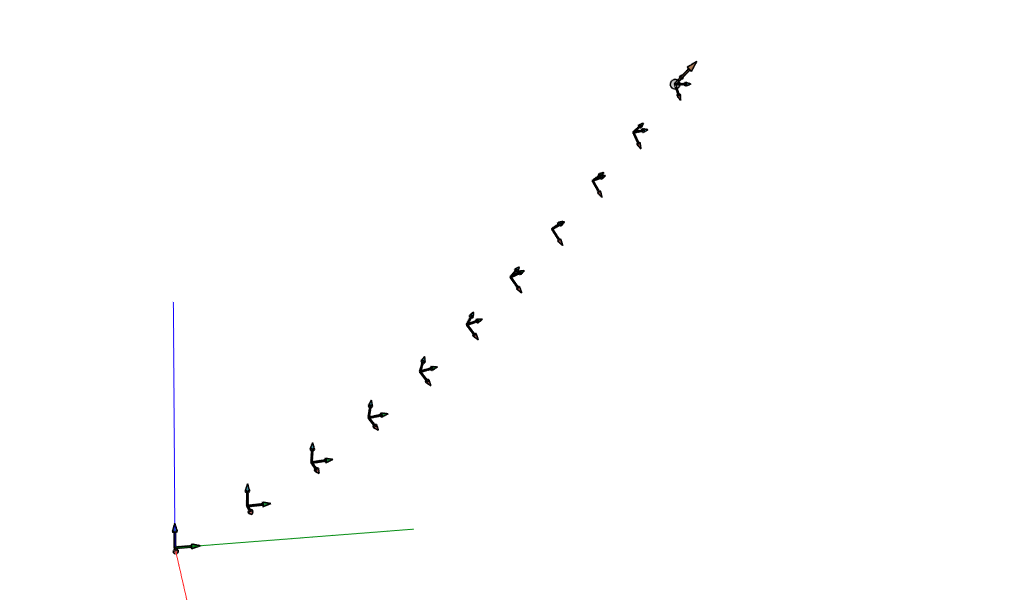

In [9]:
show(s, camera_pos = (47.27125494760996, -2.2893149055027044, 11.008934429915707), lookat = (8.191845556784727, 11.628676713890059, 10.152255428376742))

Update() calculates the forces in the model

In [10]:
s.update()

We can now verify that the applied force on axis 0 is what we expect it to be:

The first three components should be identical to the force applied on the Point

In [11]:
f.force

(3.0, 4.0, 5.0)

In [12]:
s['axis_0'].applied_force[:3]

(3.0, 4.0, 5.0)

The applied moment should be identical to the cross product of the global position of the Point and the applied force

In [13]:
np.cross(p.global_position, f.force)

array([ 43.06199224,  89.61104132, -97.52602839])

In [14]:
s['axis_0'].applied_force[3:]

(43.06199223541866, 89.61104131667722, -97.52602839459297)